## Libraries

In [1]:
# using LinearAlgebra
using SparseArrays
# using Random
using CairoMakie
# using Statistics
# using ProgressMeter
using DataFrames
using DelimitedFiles

In [2]:
include("EchoStateNetworks.jl")
using .EchoStateNetworks
include("ONReservoir.jl")
using .ONReservoir
include("TurningError.jl")
using .TurningError
include("TestingFunctions.jl")
using .TestingFunctions

## Read in Lorenz testing data

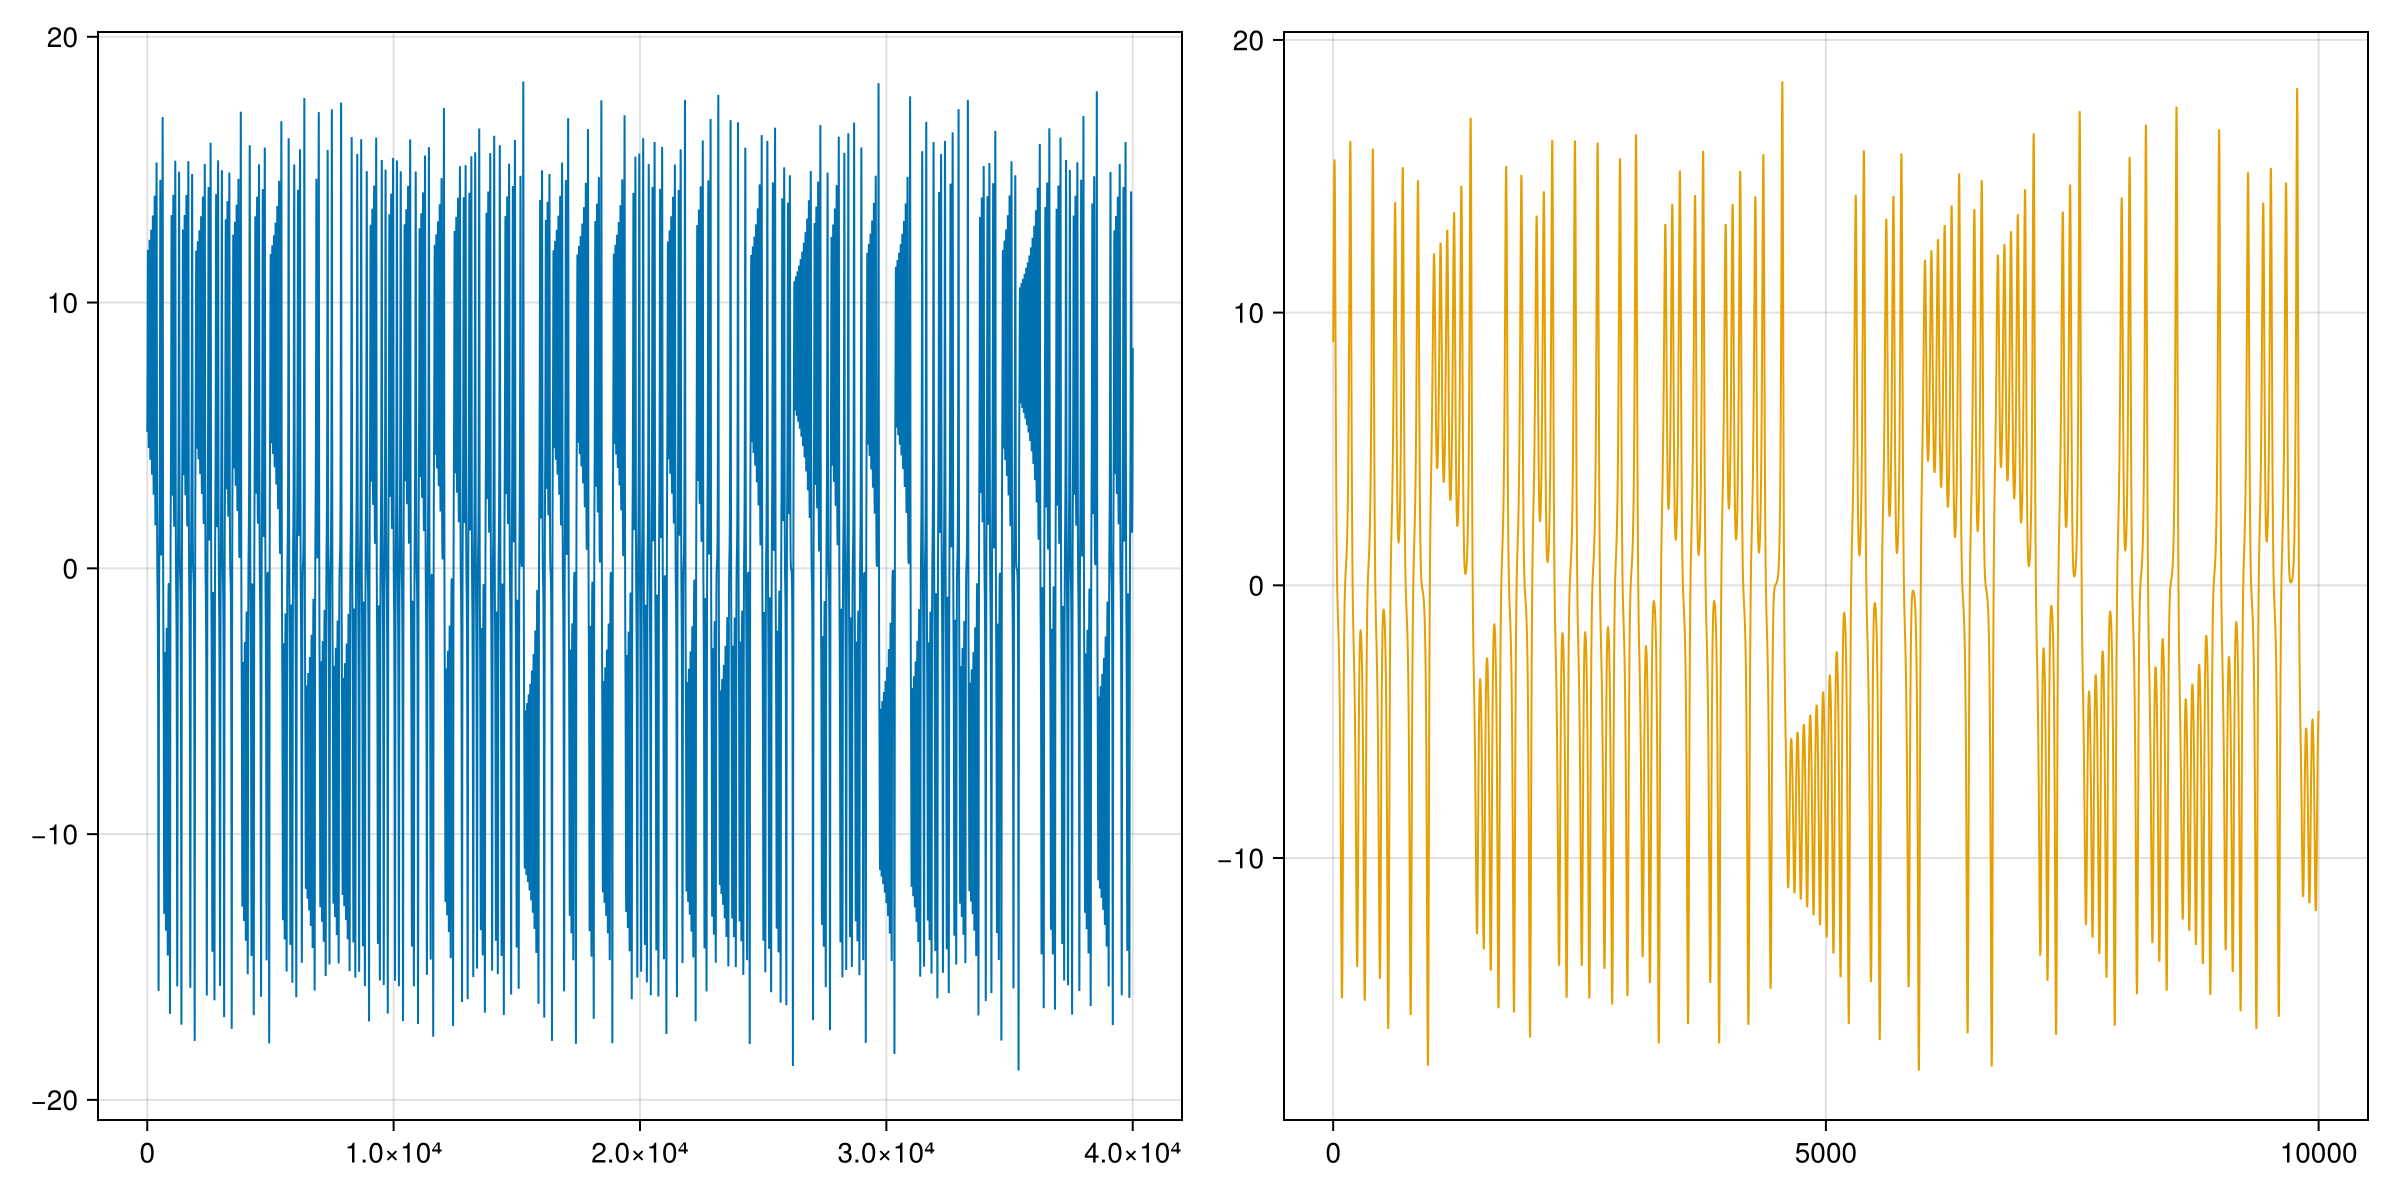

In [3]:
lo_train = vec(readdlm("lorenz_train.txt"))
lo_test = vec(readdlm("lorenz_test.txt"))

fig = Figure( size = (1200,600) )
lines!(Axis(fig[1,1]), lo_train; linewidth = 1.0, color = Cycled(1))
lines!(Axis(fig[1,2]), lo_test; linewidth = 1.0, color = Cycled(2))
fig

## Testing ON and reservoir creation

In [5]:
test_ON_part_adjacency = [
    0.7 0.1 0.2;
    0 0.7 0.3;
    0.4 0 0.6
]

k = 8
d = 3
ρ = 2.0
α = 1.0
η = 1/maximum(lo_train)
β = 0.001

ESN_params = create_ESN_params(k, d, ρ, α, η, β, num_partitions=3, ON_part_adjacency=test_ON_part_adjacency)

DataFrame(ESN_params.V_rec, :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.407648,0.124711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249422,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.523644,0.0,0.697255,0.0,0.0,0.716925,0.0,0.124711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249422,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.523644,0.0,0.0,0.0,0.315006,0.566279,0.0,0.0,0.0,0.124711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249422,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.451701,0.0,0.662144,0.0640882,0.0,0.0,0.0,0.124711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249422,0.0,0.0,0.0,0.0
5,0.0,0.697255,0.0,0.451701,0.0,0.872978,0.0,0.0,0.0,0.0,0.0,0.0,0.124711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249422,0.0,0.0,0.0
6,0.0,0.0,0.315006,0.0,0.872978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249422,0.0,0.0
7,0.0,0.0,0.566279,0.662144,0.0,0.0,0.0,0.425801,0.0,0.0,0.0,0.0,0.0,0.0,0.124711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249422,0.0
8,0.407648,0.716925,0.0,0.0640882,0.0,0.0,0.425801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249422
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.546754,0.770671,0.0,0.0,0.0,0.374133,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
m = 3
k = 4
part_connection=0.5
d = k*0.05
ρ = 1.2
α = 1.0
η = 1/maximum(lo_train)
β = 0.001
w = 1
τ = 2

window_size = (m-1)*τ
    
part_symbols_train, unique_partitions_train = create_ordinal_partition(lo_train, m, w, τ)
trans_adjacency_matrix = create_transition_matrix(part_symbols_train)
num_partitions = length(unique_partitions_train)
# trans_adjacency_map = trans_adjacency_matrix_to_map(trans_adjacency_matrix, num_partitions)

ESN_params = create_ESN_params(k, d, ρ, α, η, β, num_partitions=num_partitions, ON_part_adjacency=trans_adjacency_matrix)

R, train_states = train_one_step_pred(lo_train, ESN_params, partition_symbols=part_symbols_train)


part_symbols_test, unique_partitions_test = create_ordinal_partition(lo_test, m, w, τ, unique_partitions=unique_partitions_train)
preds, test_states = one_step_pred(lo_test, ESN_params, R, S = train_states[end,:], partition_symbols=part_symbols_test)

([0.0, 0.0, 0.0, 0.0, 13.504303952509911, 7.936010233898443, 2.2627261026740264, -0.05614631904115441, 1.7100757649814557, -1.3633559622838654  …  -10.08770273200096, -8.244648453492111, -12.417093527018302, -12.533159145893784, -12.57559752921484, -4.937632175022301, -3.9865474023188163, -4.560665290298182, -4.8696937199359205, -4.314500548827581], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; -0.8636469847701217 -0.9415696420216808 … -0.9996296916263394 0.925438871154638; -0.8511377784438431 -0.9357711943554798 … -0.9996330633370223 0.8718004019047576])

In [8]:
trans_adjacency_matrix

6×6 Matrix{Float64}:
 0.865348   0.126675   0.00797703  0.0        0.0        0.0
 0.0        0.0340633  0.931873    0.0340633  0.0        0.0
 0.0        0.0        0.0577367   0.942263   0.0        0.0
 0.0        0.0        0.0         0.867003   0.127009   0.00598802
 0.0289157  0.0        0.0         0.0        0.0289157  0.942169
 0.955711   0.0        0.0         0.0        0.0        0.044289

In [9]:
DataFrame(ESN_params.V_rec, :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.308372,0.0,0.0,0.0,0.0194189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.308372,0.0,0.0,0.0,0.0194189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.308372,0.0,0.0,0.0,0.0194189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.308372,0.0,0.0,0.0,0.0194189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.26851,0.0,0.0,0.0,0.0829221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.26851,0.0,0.0,0.0,0.0829221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.26851,0.0,0.0,0.0,0.0829221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.26851,0.0,0.0,0.0,0.0829221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0355804,0.0,2.2938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Demonstration of turning point error

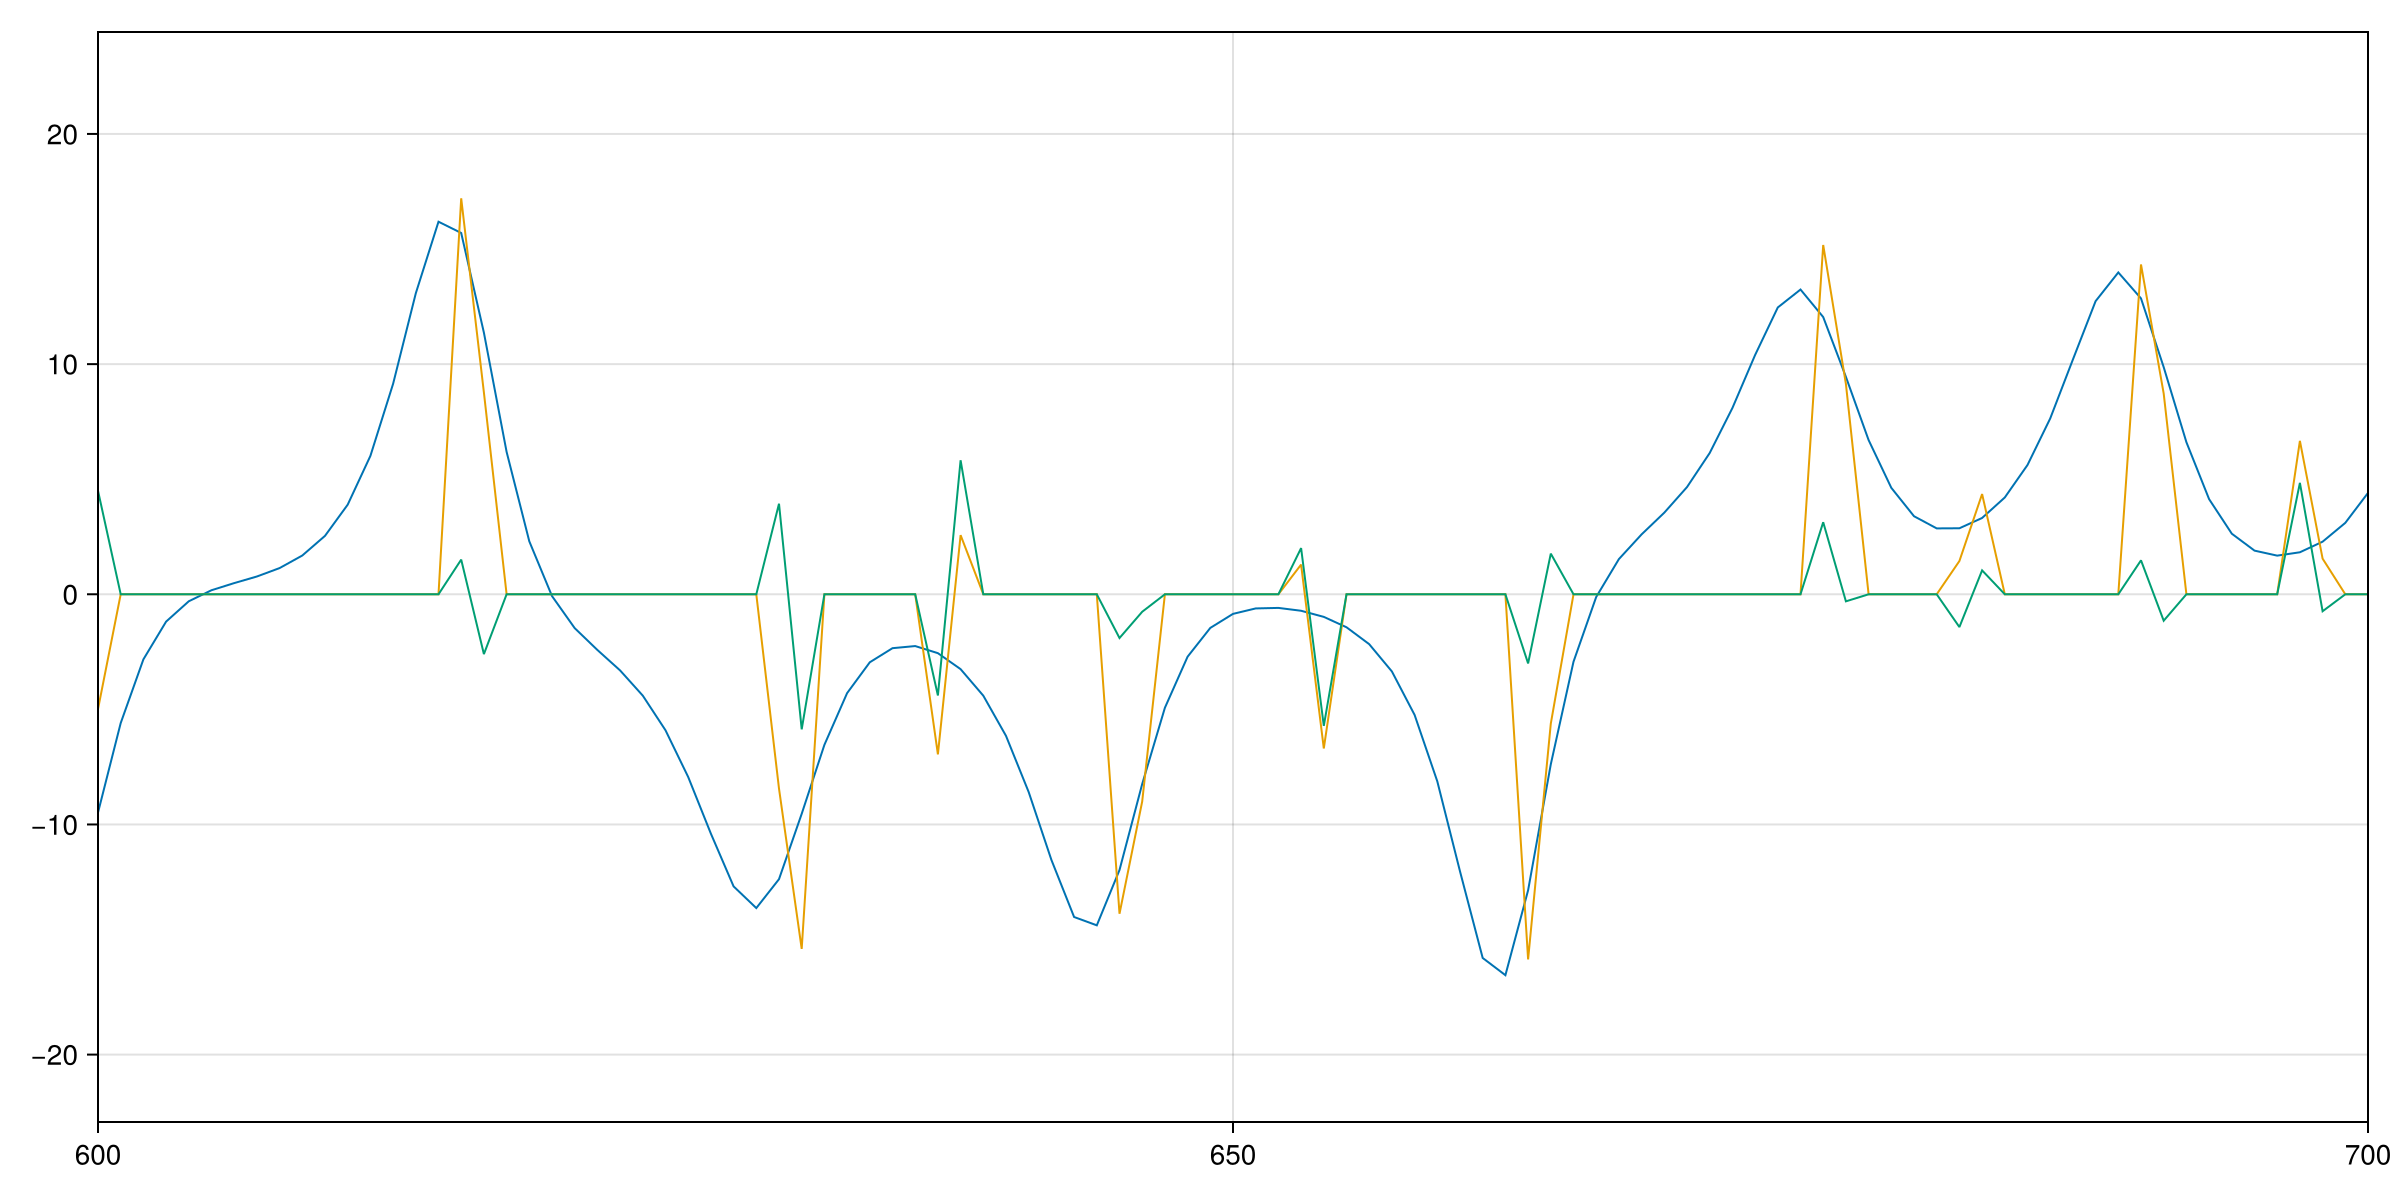

In [10]:
test_preds = lo_test + 3 * randn(length(lo_test))

test_mask = create_turning_partition_mask(lo_test, 4, 1, 1)
error = test_preds .- lo_test

fig = Figure( size = (1200,600))

ax1 = Axis(fig[1,1])
lines!(ax1, lo_test; linewidth = 1.0, color = Cycled(1))
lines!(ax1, test_preds .* test_mask; linewidth = 1.0, color = Cycled(2))
lines!(ax1, error .* test_mask; linewidth = 1.0, color = Cycled(3))

xlims!(600,700)

fig

## Single step predictions

### Equal size of overall reservoir

#### 600 total size

In [12]:
# good candidate for multithreading
ON_preds = create_pred_for_params_single_step(lo_train, lo_test, 3; k = 100, part_connection=0.5)
vanilla_preds = create_pred_for_params_single_step(lo_train, lo_test, 1; k = 600)
;

Created reservoir of size: (600,)
Created reservoir of size: (600,)


In [13]:
compare_preds(ON_preds, vanilla_preds, 200, 500, ignore_first=20)

MethodError: MethodError: no method matching compare_preds(::Vector{Float64}, ::Vector{Float64}, ::Int64, ::Int64; ignore_first::Int64)

Closest candidates are:
  compare_preds(::Any, ::Any, ::Any, ::Any, !Matched::Any; calculate_error, ignore_first, offset)
   @ Main.TestingFunctions ~/Desktop/Uni/Honours Research/echo-state-networks/TestingFunctions.jl:20


#### 60 overall size

In [16]:
ON_preds = create_pred_for_params_single_step(3; k = 10, d=2, part_connection=0.5)
vanilla_preds = create_pred_for_params_single_step(1; k = 60)
;

MethodError: MethodError: no method matching create_pred_for_params_single_step(::Int64; k::Int64, d::Int64, part_connection::Float64)

Closest candidates are:
  create_pred_for_params_single_step(::Any, !Matched::Any, !Matched::Any; k, part_connection, d, ρ, α, η, β, w, τ)
   @ Main.TestingFunctions ~/Desktop/Uni/Honours Research/echo-state-networks/TestingFunctions.jl:64


In [17]:
compare_preds(ON_preds, vanilla_preds, nothing, nothing, ignore_first=20)

MethodError: MethodError: no method matching compare_preds(::Vector{Float64}, ::Vector{Float64}, ::Nothing, ::Nothing; ignore_first::Int64)

Closest candidates are:
  compare_preds(::Any, ::Any, ::Any, ::Any, !Matched::Any; calculate_error, ignore_first, offset)
   @ Main.TestingFunctions ~/Desktop/Uni/Honours Research/echo-state-networks/TestingFunctions.jl:20


In [20]:
ON_preds = create_pred_for_params_single_step(3; k = 50, part_connection=0.5)
vanilla_preds = create_pred_for_params_single_step(1; k = 300)
;

MethodError: MethodError: no method matching create_pred_for_params_single_step(::Int64; k::Int64, part_connection::Float64)

Closest candidates are:
  create_pred_for_params_single_step(::Any, !Matched::Any, !Matched::Any; k, part_connection, d, ρ, α, η, β, w, τ)
   @ Main.TestingFunctions ~/Desktop/Uni/Honours Research/echo-state-networks/TestingFunctions.jl:64


In [21]:
compare_preds(ON_preds, vanilla_preds, nothing, nothing, ignore_first=20)

MethodError: MethodError: no method matching compare_preds(::Vector{Float64}, ::Vector{Float64}, ::Nothing, ::Nothing; ignore_first::Int64)

Closest candidates are:
  compare_preds(::Any, ::Any, ::Any, ::Any, !Matched::Any; calculate_error, ignore_first, offset)
   @ Main.TestingFunctions ~/Desktop/Uni/Honours Research/echo-state-networks/TestingFunctions.jl:20


In [23]:
ON_preds = create_pred_for_params_single_step(3; k = 200, d=2, part_connection=0.5)
vanilla_preds = create_pred_for_params_single_step(1; k = 1200)
;

MethodError: MethodError: no method matching create_pred_for_params_single_step(::Int64; k::Int64, d::Int64, part_connection::Float64)

Closest candidates are:
  create_pred_for_params_single_step(::Any, !Matched::Any, !Matched::Any; k, part_connection, d, ρ, α, η, β, w, τ)
   @ Main.TestingFunctions ~/Desktop/Uni/Honours Research/echo-state-networks/TestingFunctions.jl:64


In [24]:
compare_preds(ON_preds, vanilla_preds, nothing, nothing, ignore_first=20)

MethodError: MethodError: no method matching compare_preds(::Vector{Float64}, ::Vector{Float64}, ::Nothing, ::Nothing; ignore_first::Int64)

Closest candidates are:
  compare_preds(::Any, ::Any, ::Any, ::Any, !Matched::Any; calculate_error, ignore_first, offset)
   @ Main.TestingFunctions ~/Desktop/Uni/Honours Research/echo-state-networks/TestingFunctions.jl:20


### Equal k

#### k = 100

In [26]:
# good candidate for multithreading
ON_preds = create_pred_for_params_single_step(3; k = 100, part_connection=0.5)
vanilla_preds = create_pred_for_params_single_step(1; k = 100)
;

MethodError: MethodError: no method matching create_pred_for_params_single_step(::Int64; k::Int64, part_connection::Float64)

Closest candidates are:
  create_pred_for_params_single_step(::Any, !Matched::Any, !Matched::Any; k, part_connection, d, ρ, α, η, β, w, τ)
   @ Main.TestingFunctions ~/Desktop/Uni/Honours Research/echo-state-networks/TestingFunctions.jl:64


In [27]:
compare_preds(ON_preds, vanilla_preds, 500, 600, ignore_first=20)

MethodError: MethodError: no method matching compare_preds(::Vector{Float64}, ::Vector{Float64}, ::Int64, ::Int64; ignore_first::Int64)

Closest candidates are:
  compare_preds(::Any, ::Any, ::Any, ::Any, !Matched::Any; calculate_error, ignore_first, offset)
   @ Main.TestingFunctions ~/Desktop/Uni/Honours Research/echo-state-networks/TestingFunctions.jl:20


#### k = 10

In [28]:
# good candidate for multithreading
ON_preds = create_pred_for_params_single_step(3; k = 10, part_connection=0.5)
vanilla_preds = create_pred_for_params_single_step(1; k = 10)
;

MethodError: MethodError: no method matching create_pred_for_params_single_step(::Int64; k::Int64, part_connection::Float64)

Closest candidates are:
  create_pred_for_params_single_step(::Any, !Matched::Any, !Matched::Any; k, part_connection, d, ρ, α, η, β, w, τ)
   @ Main.TestingFunctions ~/Desktop/Uni/Honours Research/echo-state-networks/TestingFunctions.jl:64


In [29]:
compare_preds(ON_preds, vanilla_preds, 500, 600, ignore_first=20)

MethodError: MethodError: no method matching compare_preds(::Vector{Float64}, ::Vector{Float64}, ::Int64, ::Int64; ignore_first::Int64)

Closest candidates are:
  compare_preds(::Any, ::Any, ::Any, ::Any, !Matched::Any; calculate_error, ignore_first, offset)
   @ Main.TestingFunctions ~/Desktop/Uni/Honours Research/echo-state-networks/TestingFunctions.jl:20


#### k = 500

In [30]:
# good candidate for multithreading
ON_preds = create_pred_for_params_single_step(3; k = 500, part_connection=0.5)
vanilla_preds = create_pred_for_params_single_step(1; k = 500)
;

MethodError: MethodError: no method matching create_pred_for_params_single_step(::Int64; k::Int64, part_connection::Float64)

Closest candidates are:
  create_pred_for_params_single_step(::Any, !Matched::Any, !Matched::Any; k, part_connection, d, ρ, α, η, β, w, τ)
   @ Main.TestingFunctions ~/Desktop/Uni/Honours Research/echo-state-networks/TestingFunctions.jl:64


In [31]:
compare_preds(ON_preds, vanilla_preds, 500, 600, ignore_first=20)

MethodError: MethodError: no method matching compare_preds(::Vector{Float64}, ::Vector{Float64}, ::Int64, ::Int64; ignore_first::Int64)

Closest candidates are:
  compare_preds(::Any, ::Any, ::Any, ::Any, !Matched::Any; calculate_error, ignore_first, offset)
   @ Main.TestingFunctions ~/Desktop/Uni/Honours Research/echo-state-networks/TestingFunctions.jl:20


## Freerun predictions

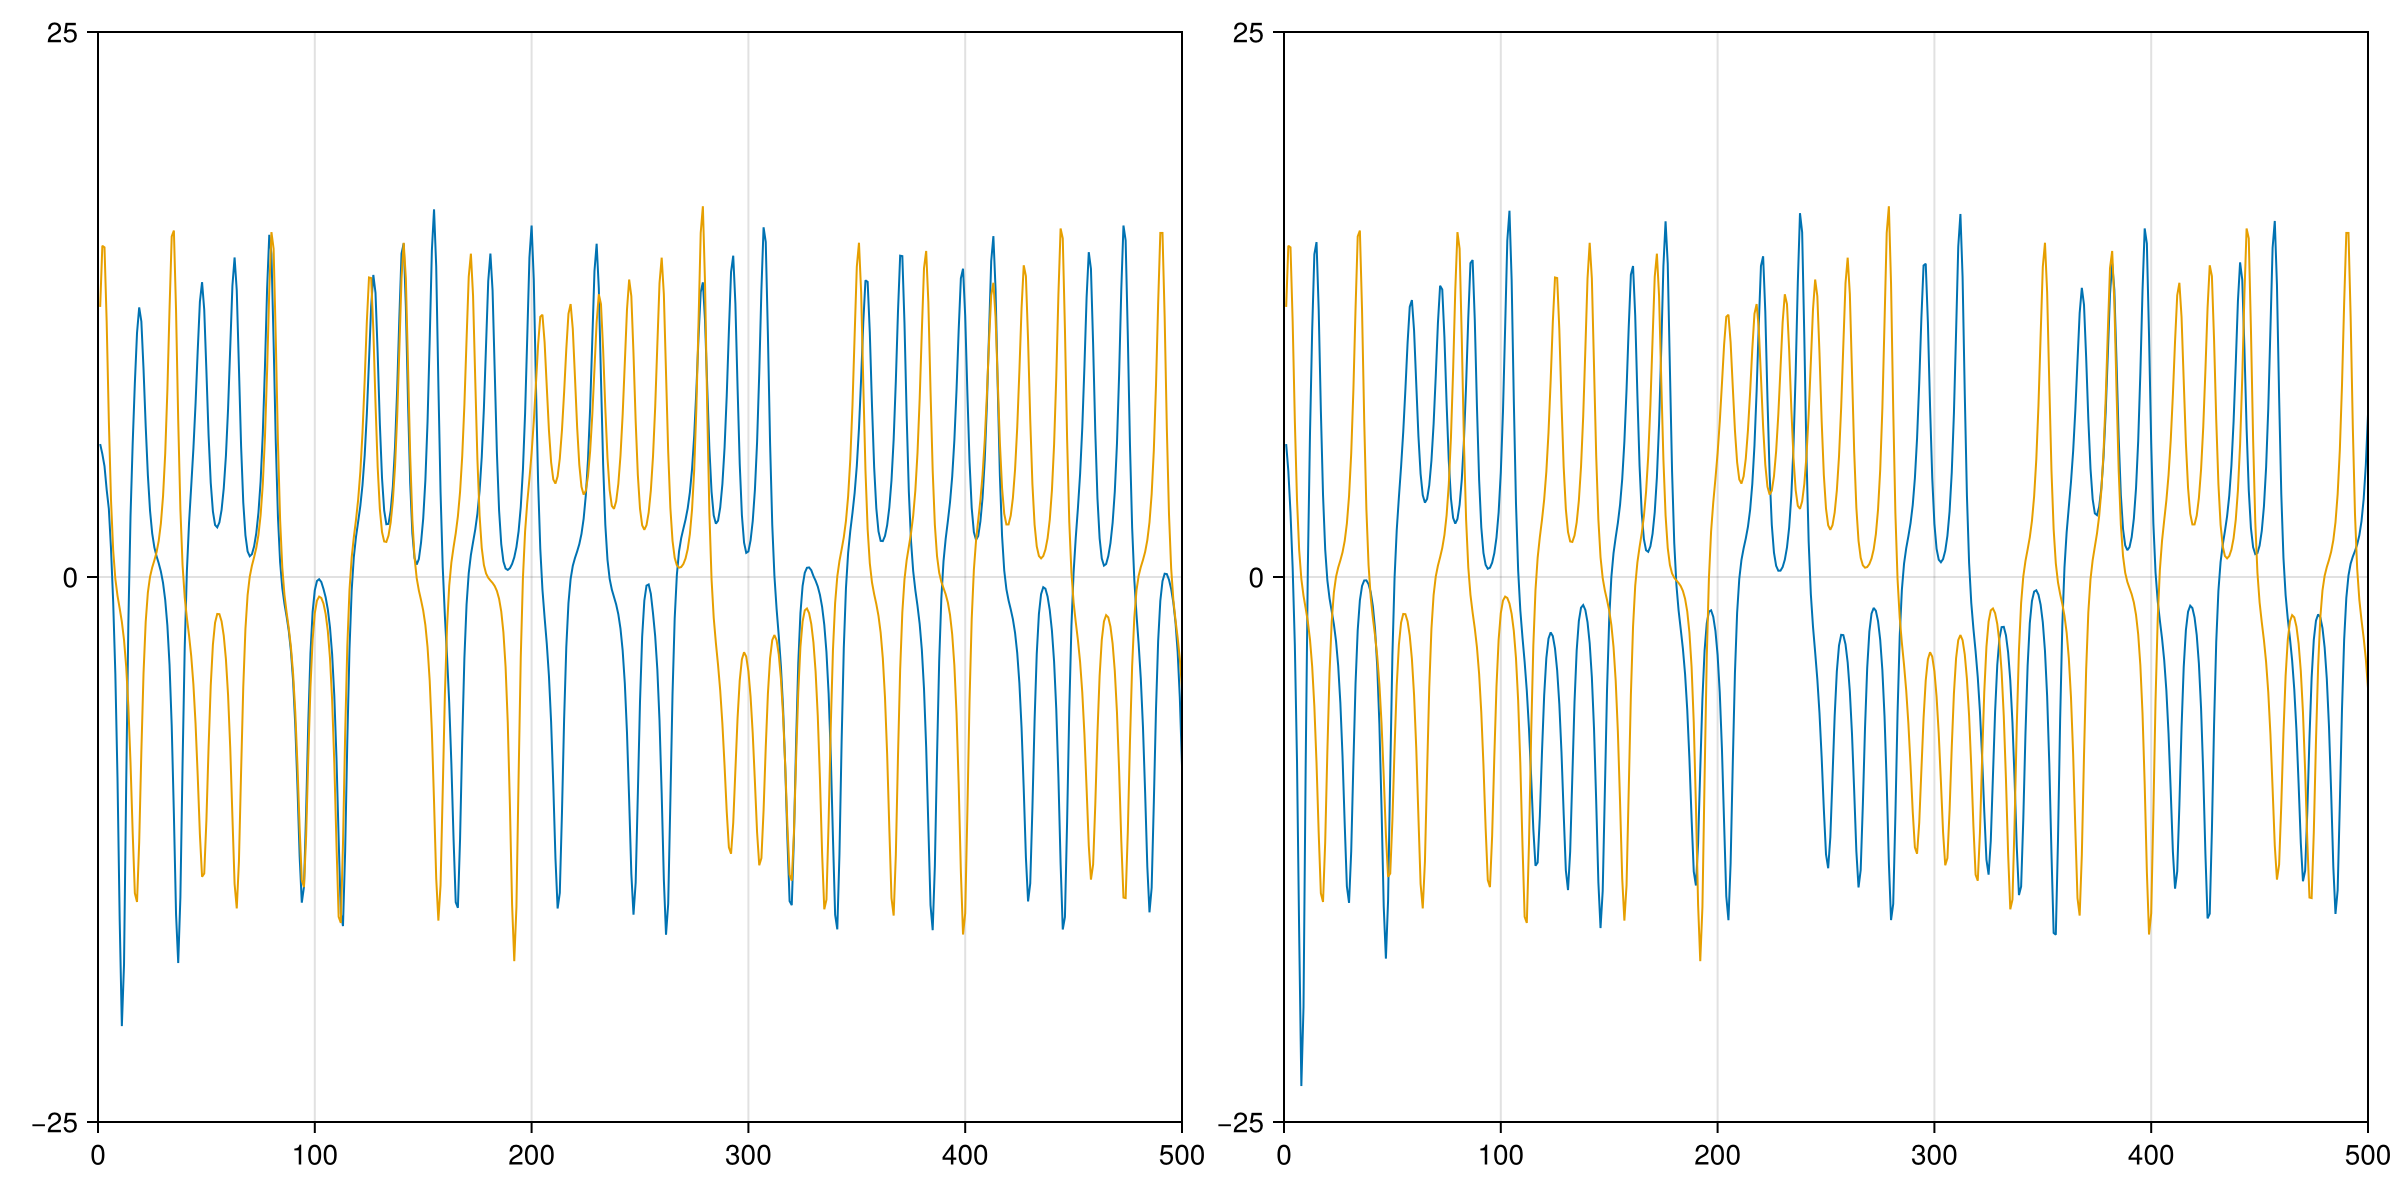

In [32]:
ON_preds_freerun = create_pred_for_params_free_run(lo_train, length(lo_test), 4; k = 100)
vanilla_preds_freerun = create_pred_for_params_free_run(lo_train, length(lo_test), 1; k = 400)

compare_preds(lo_test, ON_preds_freerun, vanilla_preds_freerun, 0, 500, calculate_error=false)

## Multi step predictions

1/5 - Testing multi-step with 1 steps.
2/5 - Testing multi-step with 5 steps.
3/5 - Testing multi-step with 10 steps.
4/5 - Testing multi-step with 30 steps.
5/5 - Testing multi-step with 50 steps.


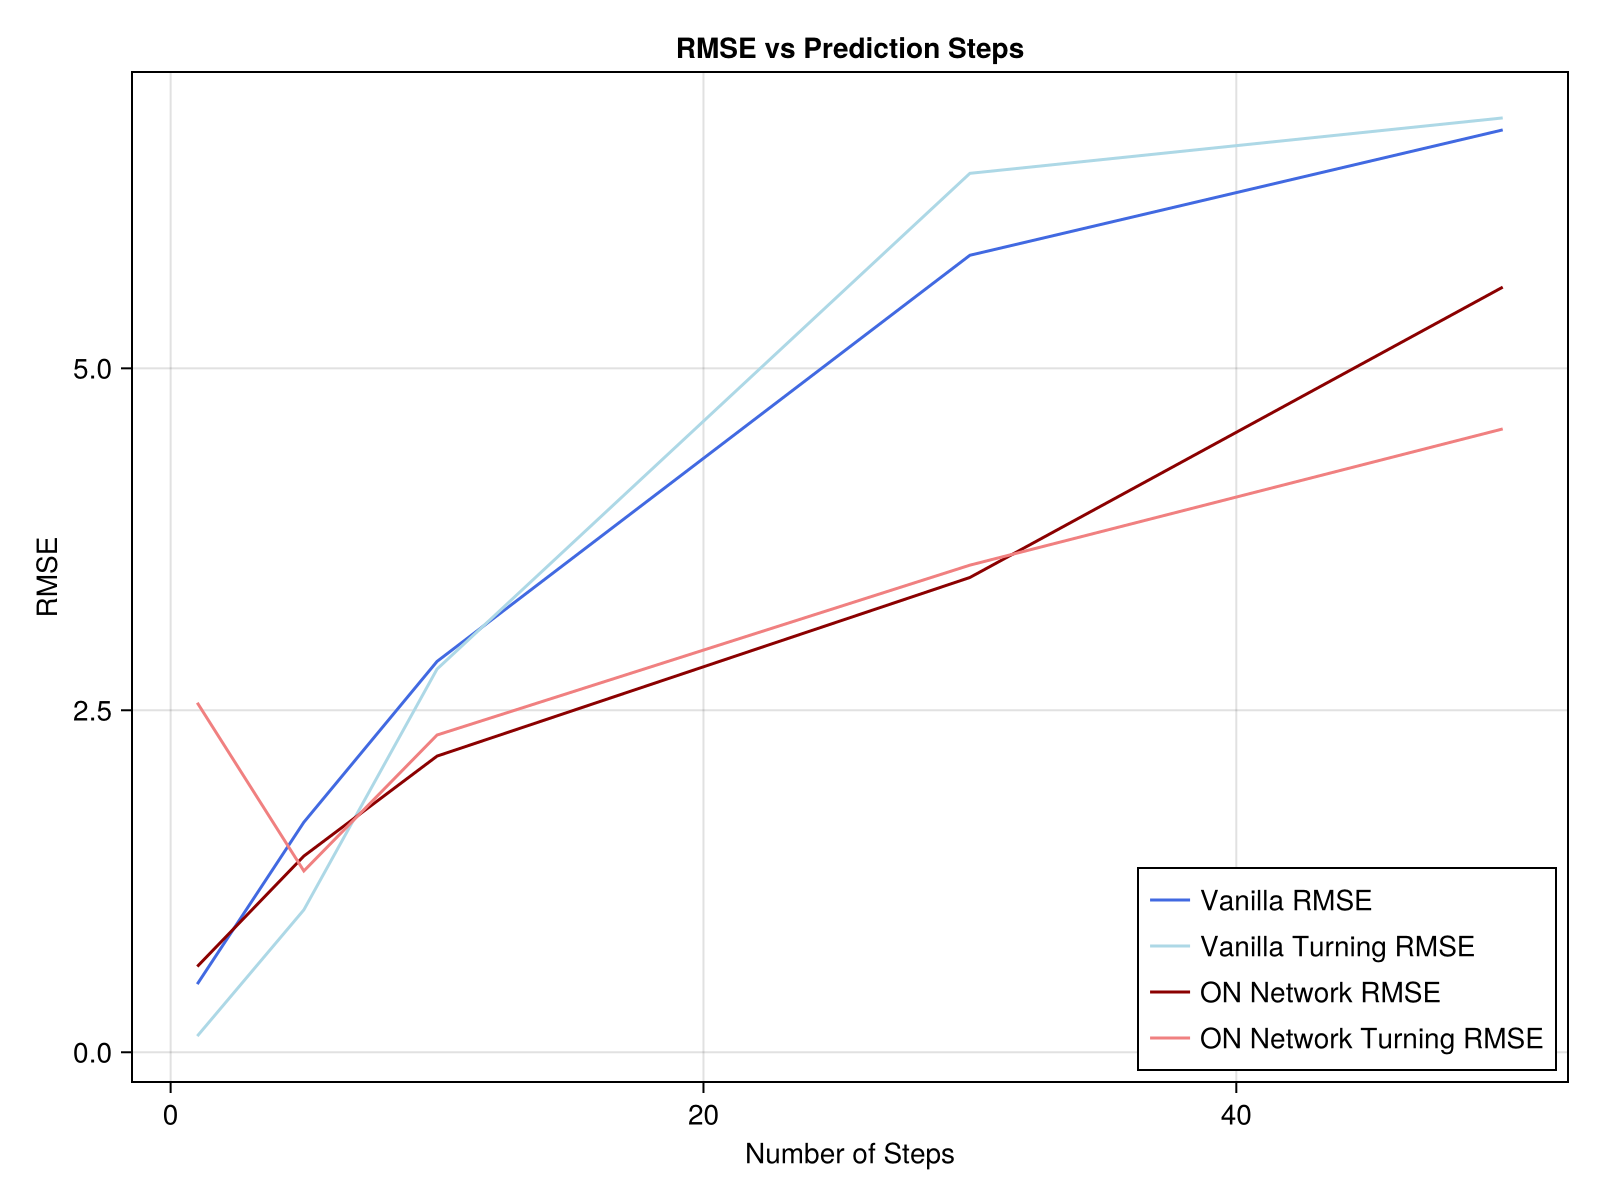

In [5]:
graph_multi_step_RMSE_vs_n_steps(lo_train, lo_test, [1, 5, 10, 30, 50], 3, 50; ignore_first=100, trials=30)

Overall RMSE:
    Vanilla: 5.7604684788664295
    Ordinal network reservoir: 7.1780475849377945
Turning partition RMSE:
    Vanilla: 5.508256868243907
    Ordinal network reservoir: 7.660988456339568


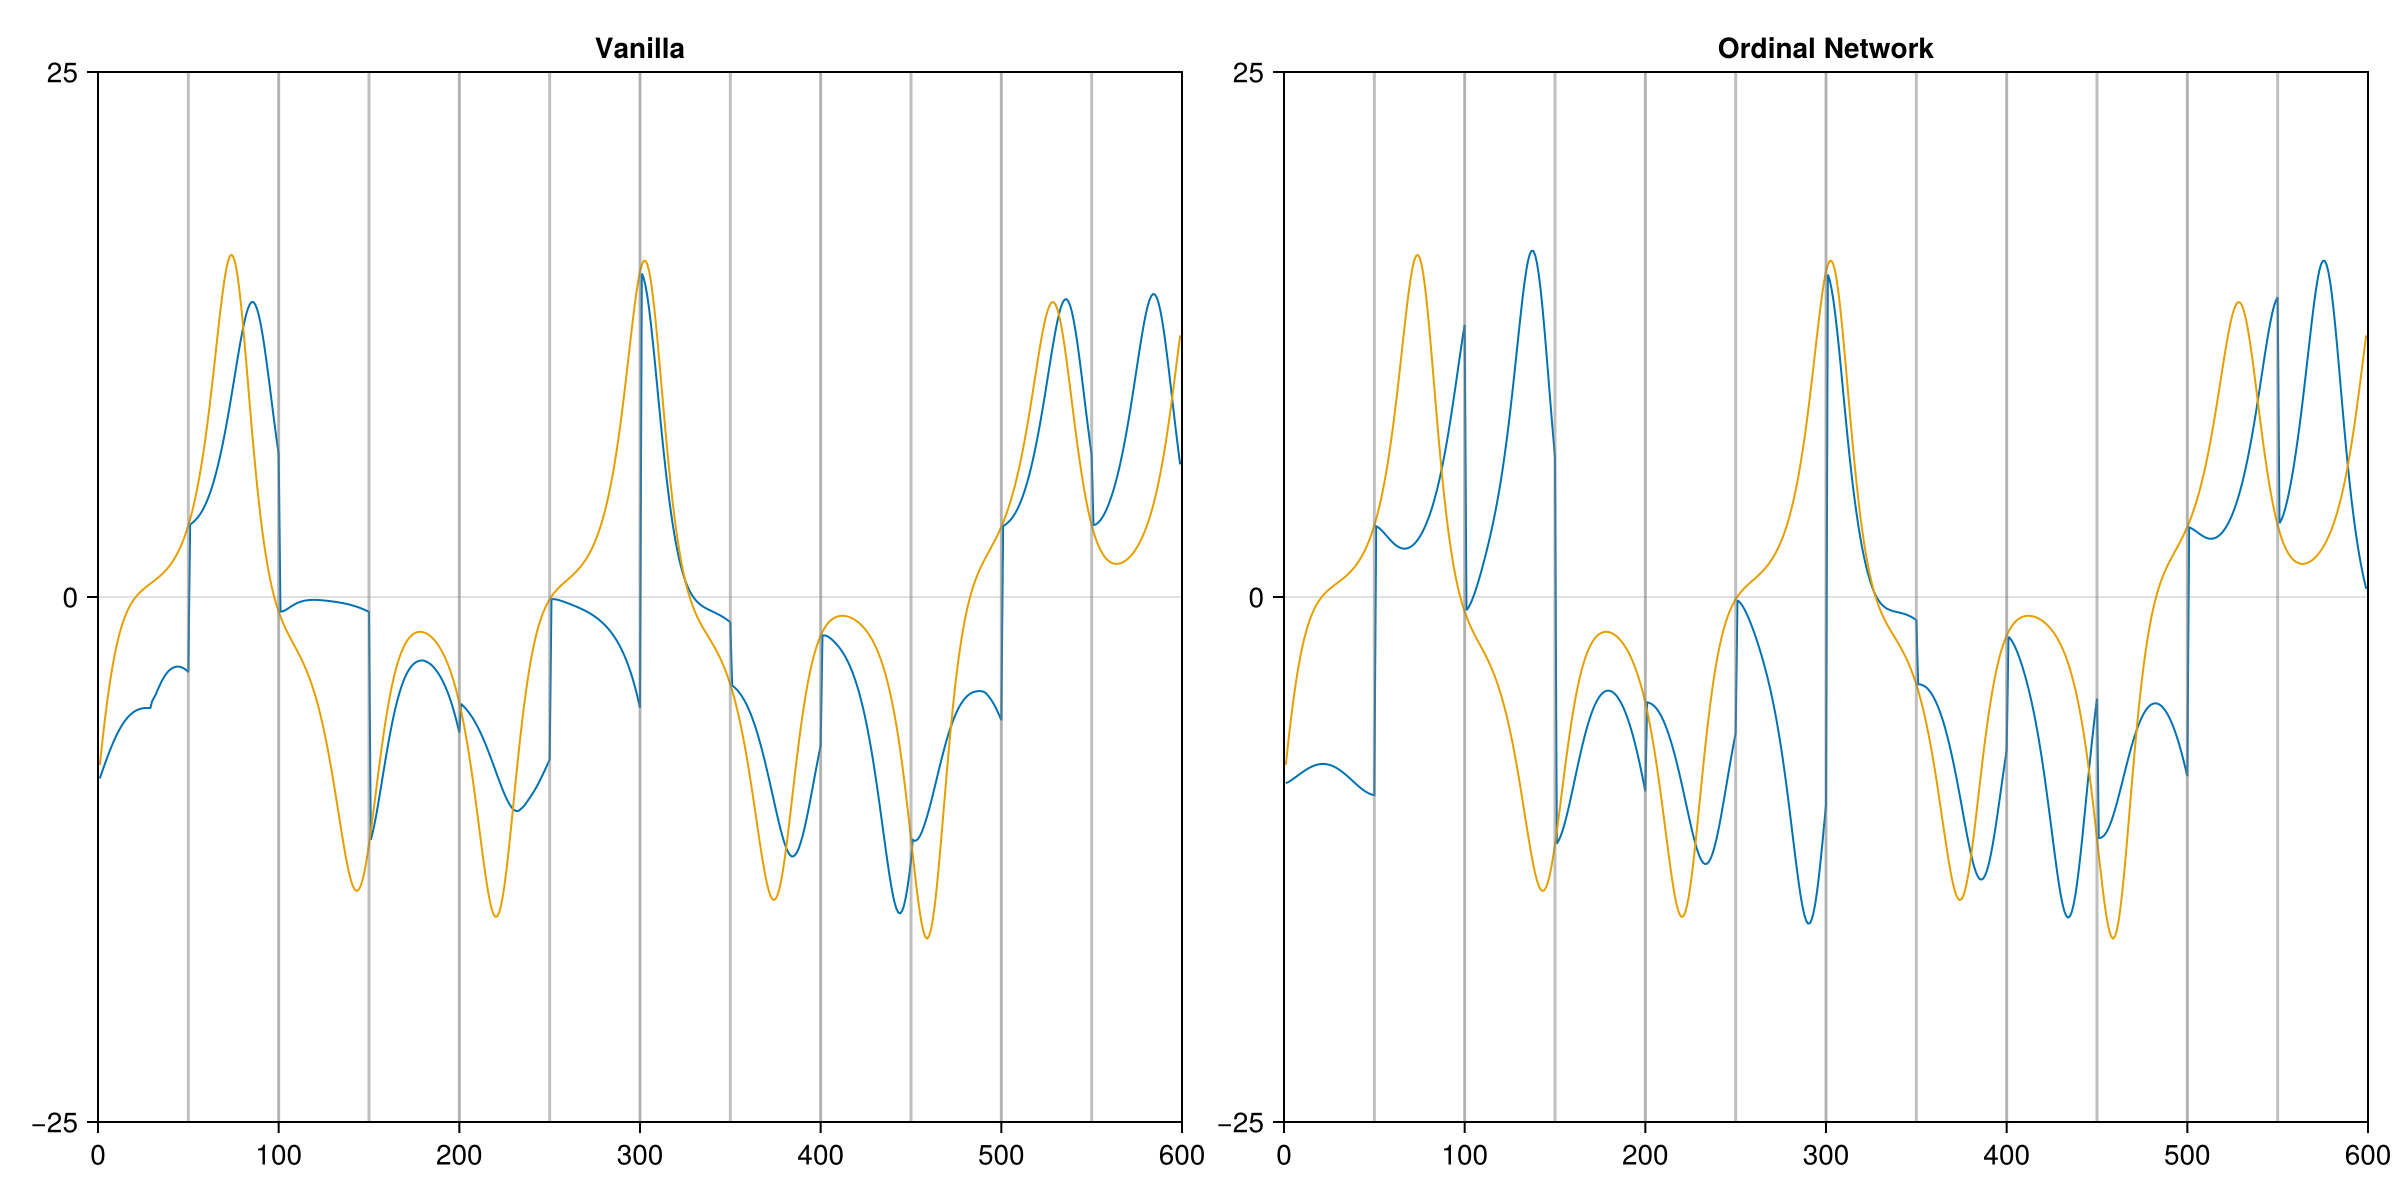

In [5]:
test_multi_step(lo_train, lo_test, 3, 100, n_steps=50, from=0, to=600)

Vanilla prediction RMSE: 3.251007749715453
Ordinal network reservoir prediction RMSE: 4.856093309045862
Vanilla prediction turning partition RMSE: 3.7150641507383946
Ordinal network reservoir prediction turning partition RMSE: 5.723382206437823


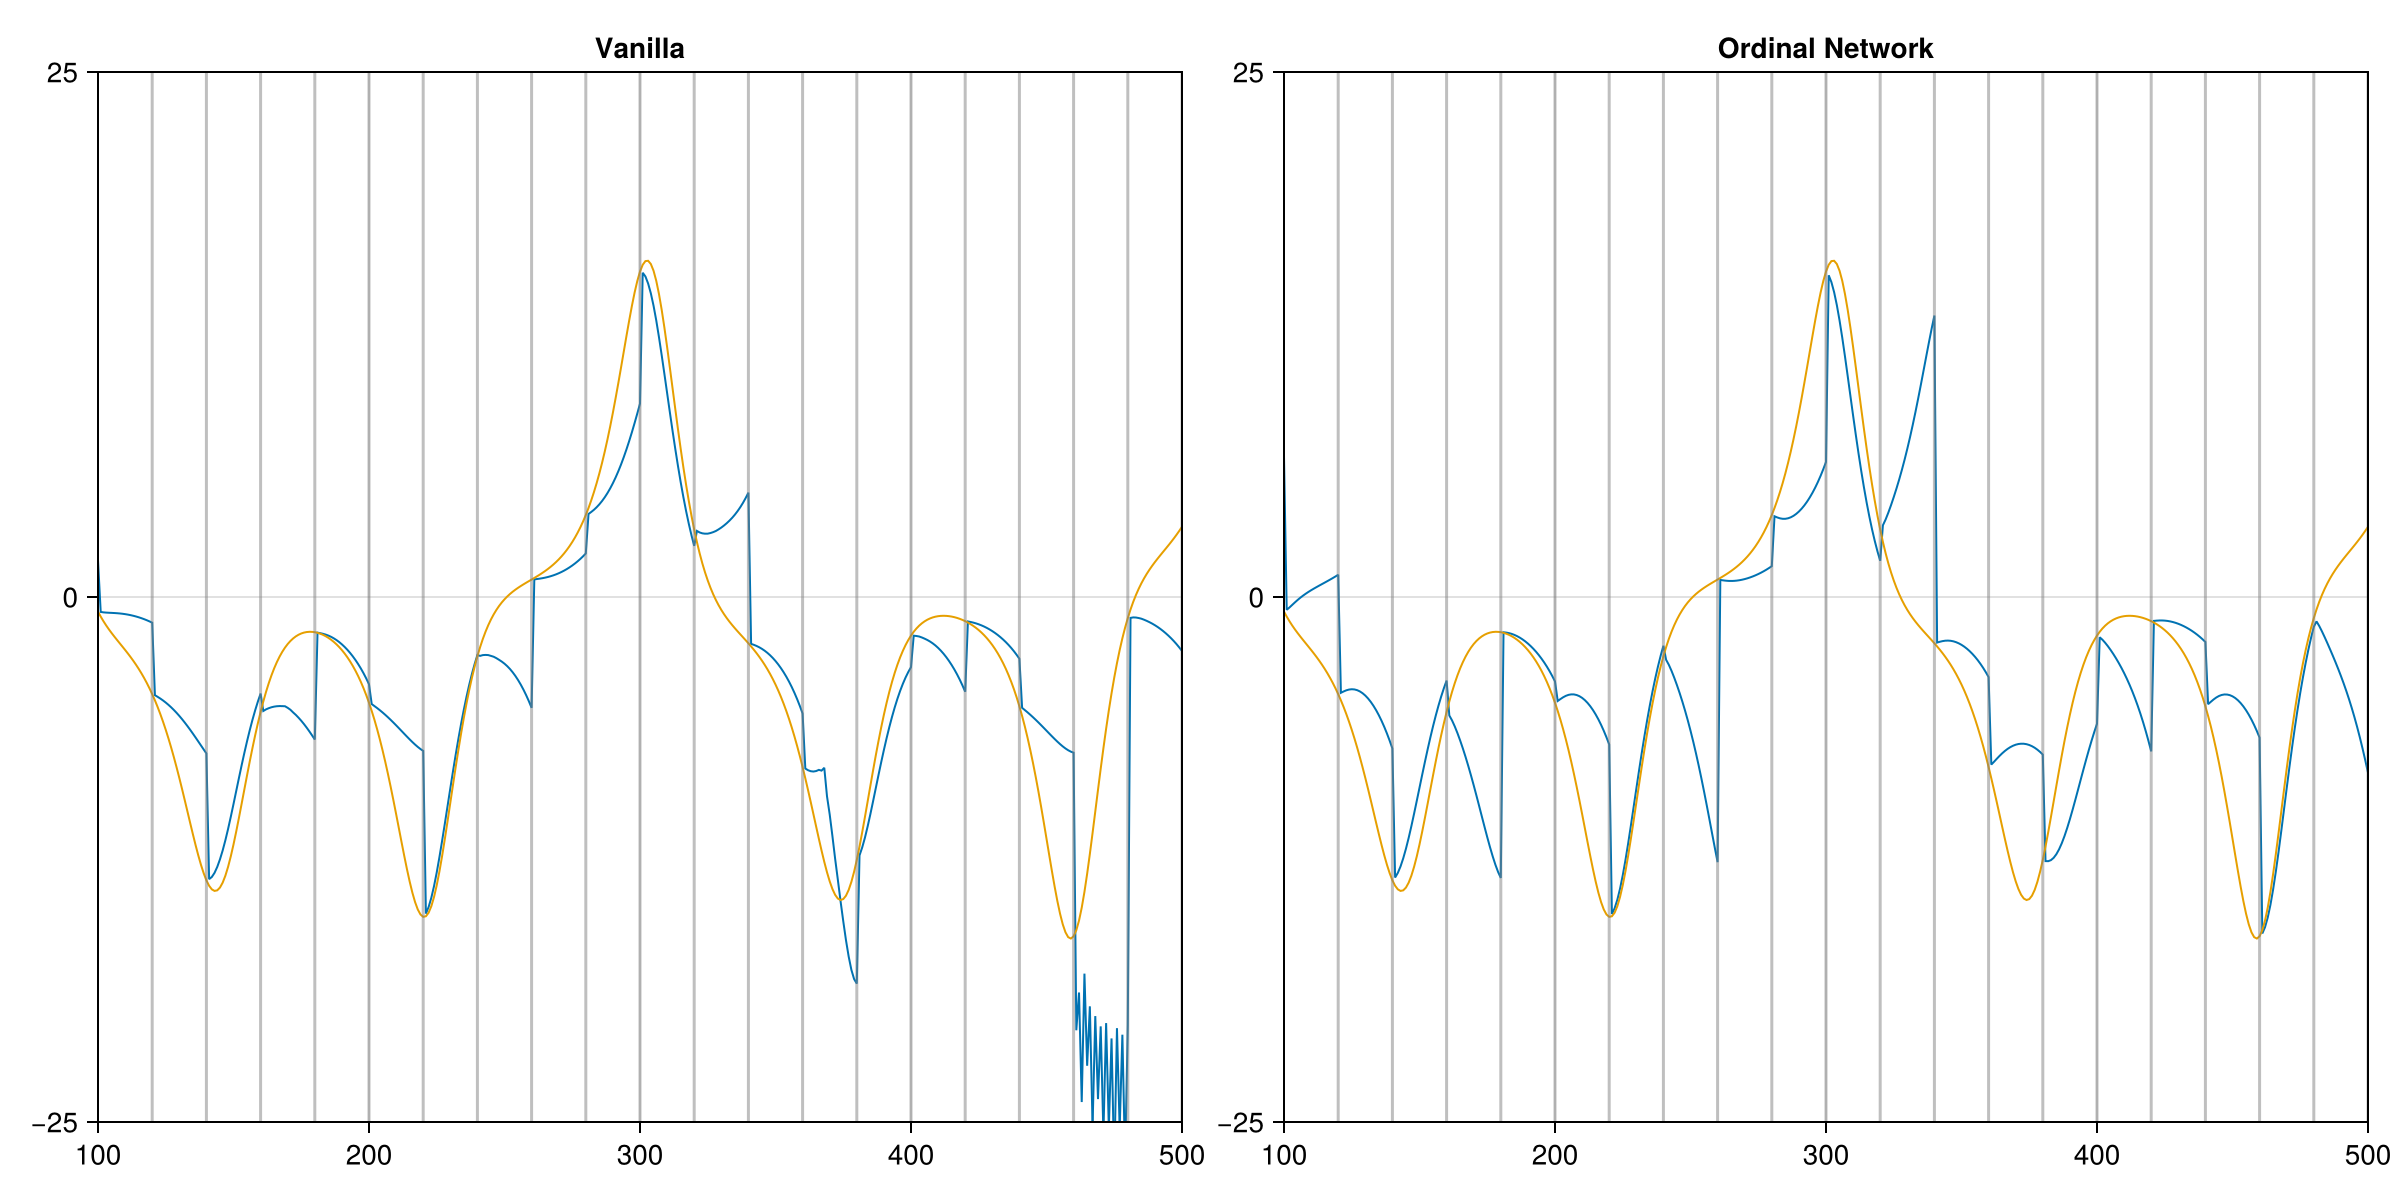

In [5]:
test_multi_step(lo_train, lo_test, 4, 100, n_steps=20, from=100, to=500)

Vanilla prediction RMSE: 1.637658039821138
Ordinal network reservoir prediction RMSE: 1.3164081124050637
Vanilla prediction turning partition RMSE: 1.8008578505687676
Ordinal network reservoir prediction turning partition RMSE: 0.7071713975799307


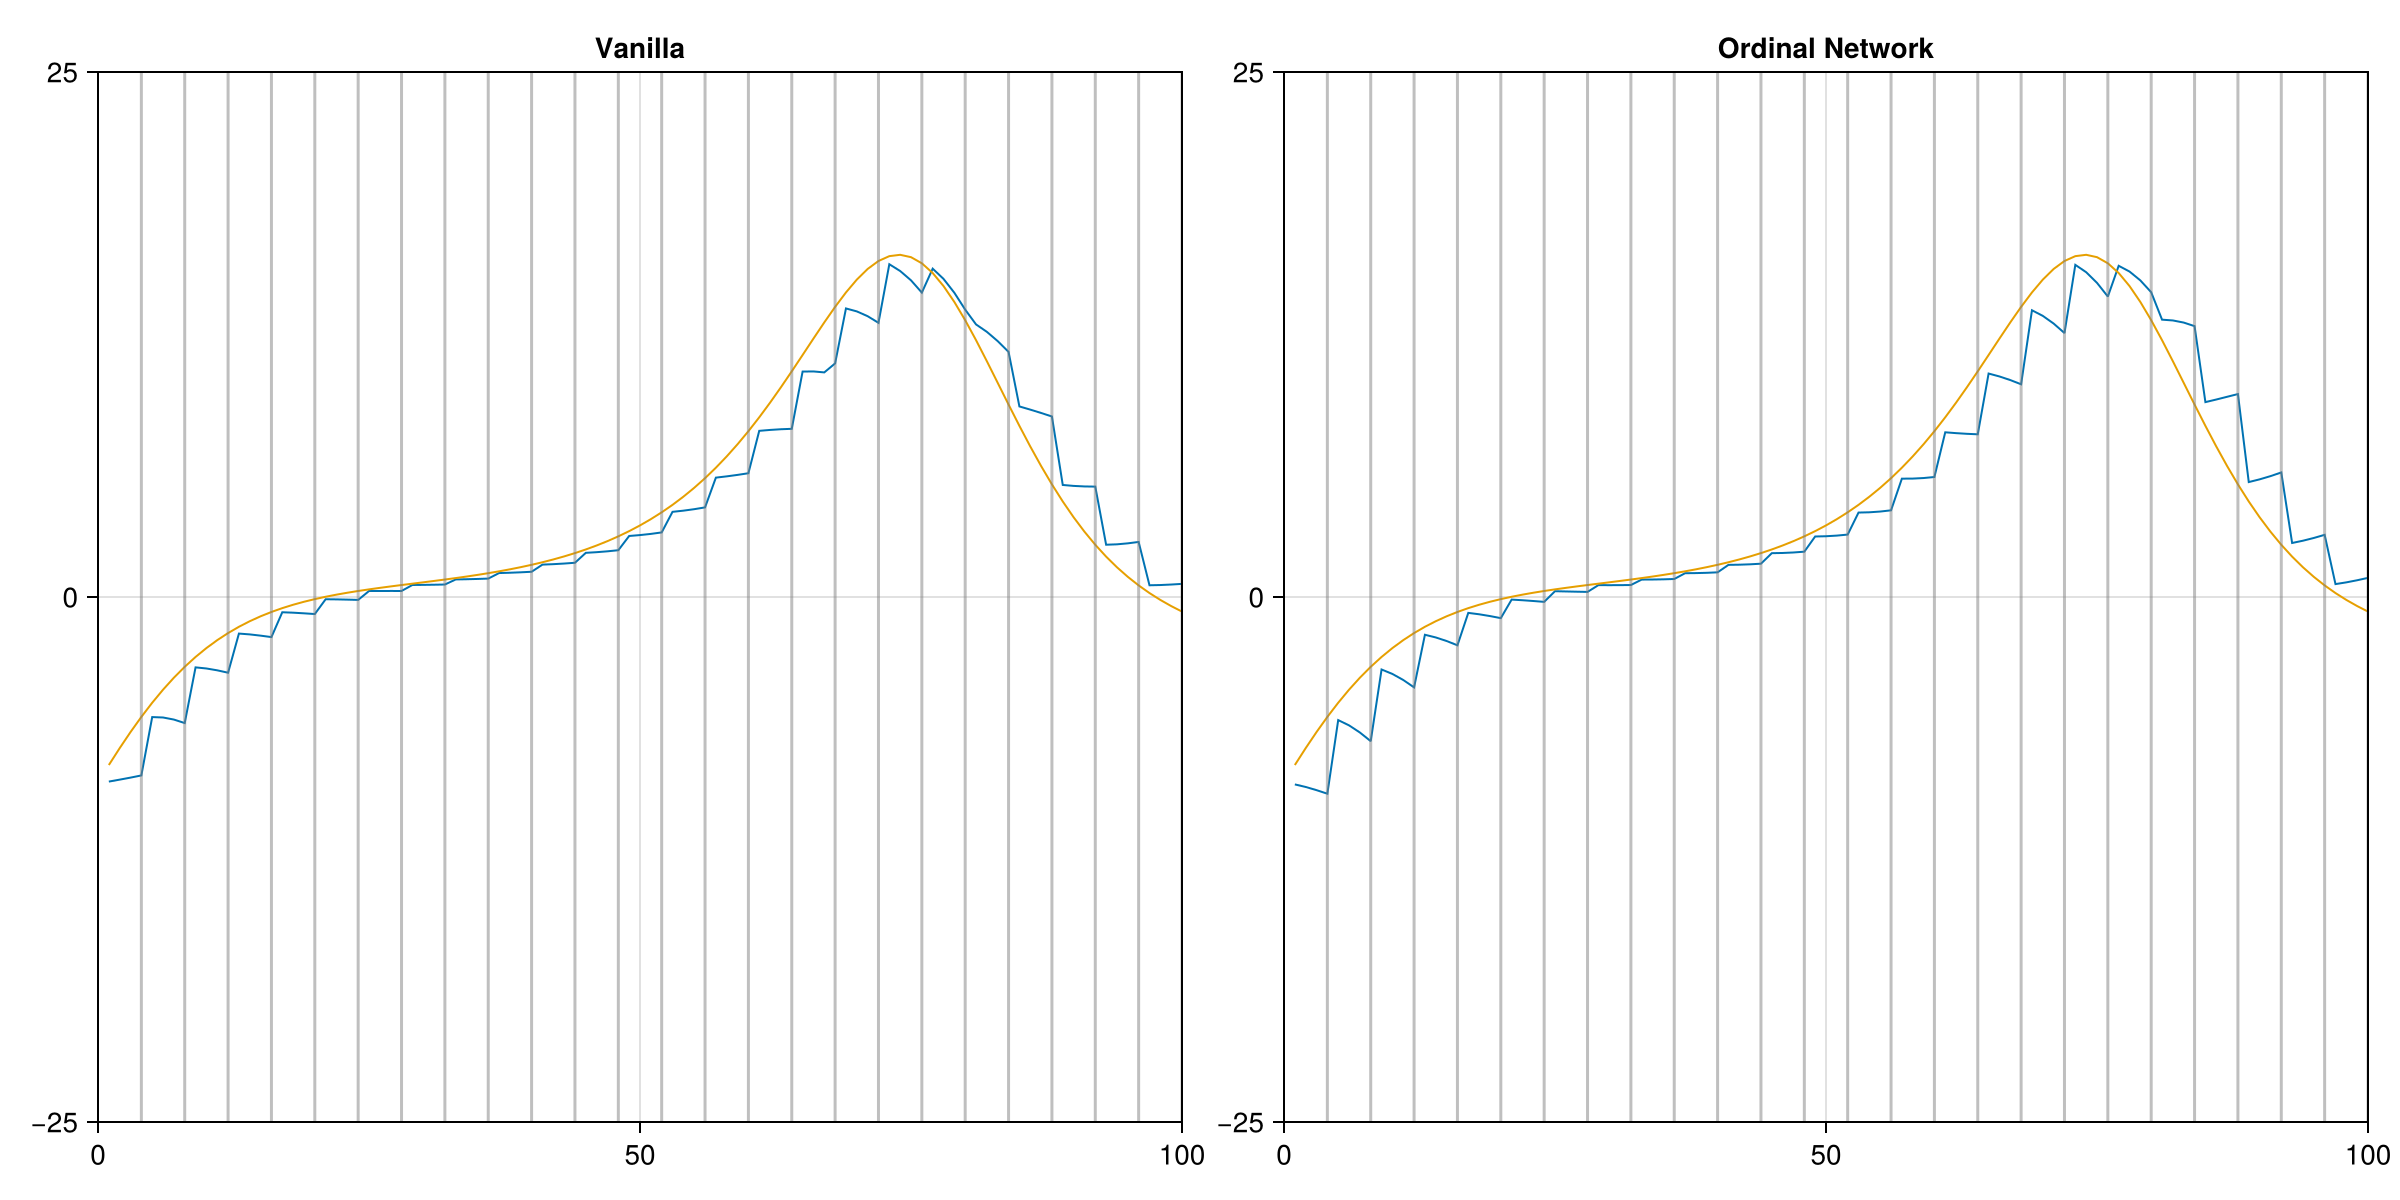

In [6]:
test_multi_step(lo_train, lo_test, 3, 400, n_steps=4, from=0, to=100)